In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("Z:/Study/ziggy std/Mr. Prakash Senapathi/Class Notes/25-05-22 NLP Projects/6. NLP PROJECTS/TASK - 56/Sentiment.csv")

In [4]:
df.shape

(13871, 21)

In [5]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [6]:
df = df[['text','sentiment']]
df

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [7]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size = 0.1)


In [22]:
test

,text,sentiment
1961,RT @Clarknt67: I trust #trans solider @OnlySha...,Positive
6574,RT @DamienFahey: When Jeb Bush speaks during a...,Negative
387,RT @NewsWriter2: So we have Americans getting ...,Negative
9666,RT @jsn2007: What ever happened to the answers...,Negative
5027,RT @DocInRealLife: RT if you'd rather vote for...,Neutral
...,...,...
5110,RT @TuneInfinity: After last nights #GOPDebate...,Negative
594,Maybe if we should paying attention to every l...,Negative
4064,RT @tedcruz: RT if you agree it's #ATimeForTru...,Neutral
3877,Very engaging summary of the #GOPDebate by @wa...,Neutral


In [8]:
train.shape

(12483, 2)

In [9]:
test.shape

(1388, 2)

In [10]:
train = train[train.sentiment != "Neutral"]
train_pos = train[ train['sentiment'] == 'Positive']
train_pos_w = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg_w = train_neg['text']


In [11]:
train_neg_w

8837     RT @RWSurferGirl: We the American people pick ...
2392     #GOPDebate hard to find so much disrespect for...
6850     RT @CounselorAdrian: #BerkeleyBreathed came ba...
8149     RT @jordular: Wham, Bam, Thank You, Ann! How t...
2931     @Salon @AntarianRani - It's sinking in with th...
                               ...                        
11051    RT @cloudypianos: I'm just waiting for them al...
9035     RT @RWSurferGirl: We the American people pick ...
13767    RT @RWSurferGirl: I am wondering what Fox is u...
3763     #RealityCheck: Rupert Murdoch &amp; Valerie Ja...
3007     The Biggest Reality Show on Earth. #GOPDebate ...
Name: text, Length: 7658, dtype: object

In [12]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos_w

379      RT @nevagphx1: @CarlyFiorina Magnificent at th...
12663    CDM @RWSurferGirl  3m3 minutes ago\nThanks Fox...
6802     Donald Trump gets the award for most entertain...
5969     RT @AllieRenison: This is true. Fox News team ...
7564     Oh my G-O-S-H. She really is fantastic! #Carly...
                               ...                        
7935     RT @Lrihendry: #TedCruz As President, I will a...
5667     “@megynkelly: What do you think of the #GOPDeb...
2730     @FoxNews #GOPDebate In the end, impressed with...
9306     #GOPDebates #RandPaul2016 telling #ChrisChrist...
1577     RT @ShooterMcGavin_: Donald Trump is the Shoot...
Name: text, Length: 2000, dtype: object

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


Positive words


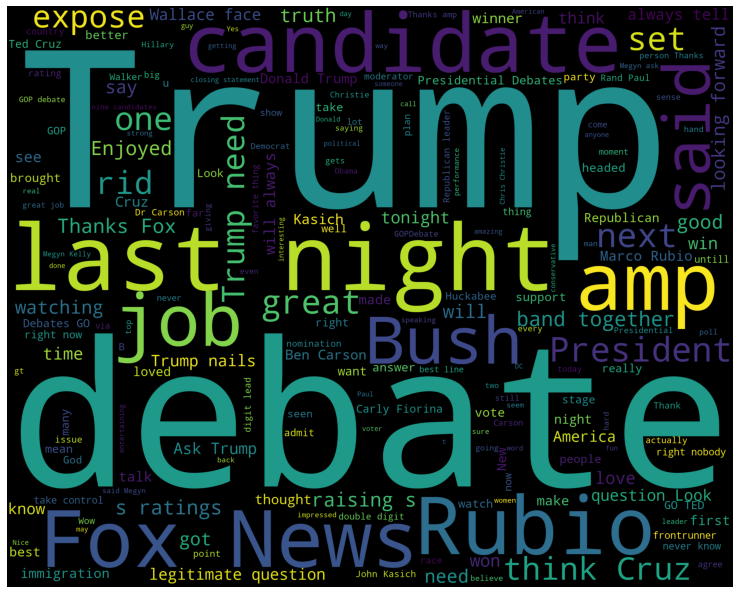

Negative words


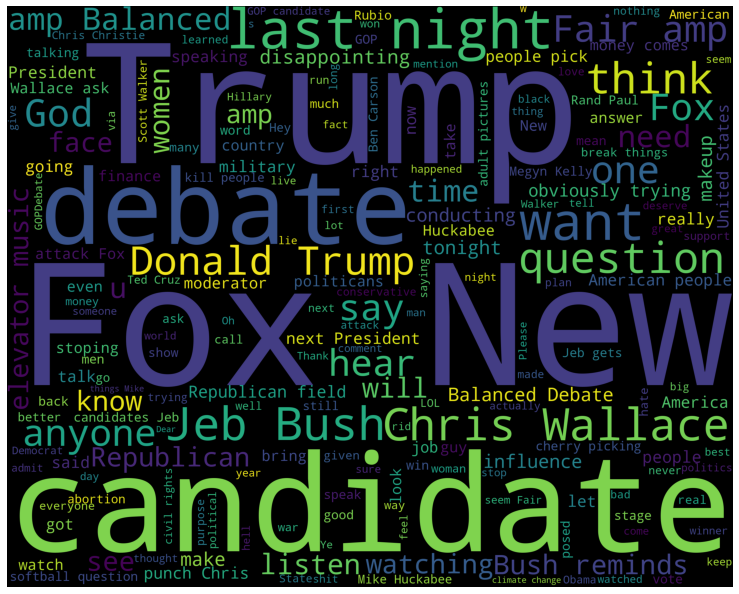

In [14]:
def wc_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("Positive words")
wc_draw(train_pos_w)
print("Negative words")
wc_draw(train_neg_w)    

In [15]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos_w = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg_w = test_neg['text']

In [26]:
test_pos_w

1961    RT @Clarknt67: I trust #trans solider @OnlySha...
307     RT @abbijacobson: Shiiiittt, it's tough to say...
631     #Trump2016 #GOPDebate The Illuminati want him ...
9290    RT @DonnieWahlberg: Enjoyed the #GOPDebates an...
7693    Best line of the night?\n\n#MarcoRubio #GOPDeb...
                              ...                        
971     Interesting #GOPDebate analysis. @marcorubio c...
4996    The best thing in #GOPDebate was @GovChristie ...
8207    Biggest #PowerMove I made last night was stayi...
309     @bullriders1 @Olivianuzzi @daveweigel The #GOP...
7487    RT @TheMurdochTimes: OK, sure. @RupertMurdoch:...
Name: text, Length: 236, dtype: object

In [16]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

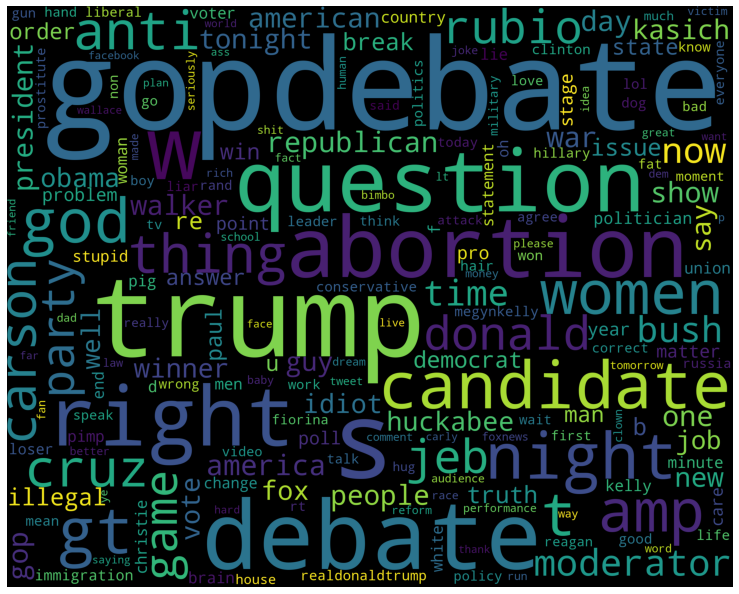

In [17]:
wc_draw(w_features)


In [20]:
# Training the Naive Bayes classifier
import nltk
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [27]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg_w: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos_w: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg_w),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos_w),pos_cnt))    

[Negative]: 835/802 
[Positive]: 236/86 
